In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')

In [4]:
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


In [5]:
wisc_emp.head(10)

,Month,Employment
0,1961-01,239.6
1,1961-02,236.4
2,1961-03,236.8
3,1961-04,241.5
4,1961-05,243.7
5,1961-06,246.1
6,1961-07,244.1
7,1961-08,244.2
8,1961-09,244.8
9,1961-10,246.6


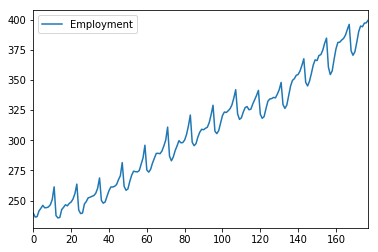

In [6]:
wisc_emp.plot()

In [7]:
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

In [8]:
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons
            
initialize_seasonalilty(wisc_emp['Employment'], 12) 

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.4035714285714453,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.2249999999999801,
 8: 3.5392857142857048,
 9: 6.8964285714285598,
 10: 11.774999999999986,
 11: 19.410714285714267}

In [9]:
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

In [10]:
wisc_emp['TEF001'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 0, 1, 0)
wisc_emp['TEF010'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 0, 1, 0, 0)
wisc_emp['TEF100'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 0, 0)

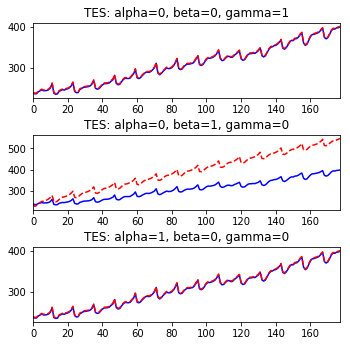

In [11]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF001'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=0, gamma=1')

ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF010'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=0')

ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF100'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=0')
fig.subplots_adjust(hspace=.5)

In [12]:
wisc_emp['TEF110'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 0, 0)
wisc_emp['TEF101'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 0, 1, 0)
wisc_emp['TEF011'] = triple_exp_smoothing(wisc_emp['Employment'], 12, 1, 1, 1, 0)

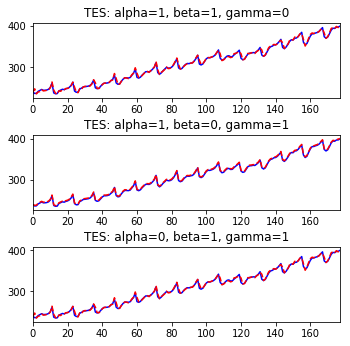

In [13]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(3,1,1)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF110'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=1, gamma=0')

ax = fig.add_subplot(3,1,2)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF101'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0, gamma=1')

ax = fig.add_subplot(3,1,3)
wisc_emp['Employment'].plot(color='b', linestyle = '-', ax=ax)
wisc_emp['TEF011'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=0, beta=1, gamma=1')
fig.subplots_adjust(hspace=.5)

In [14]:
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)

Text(0.5,1,'Triple Smoothing Forecast')

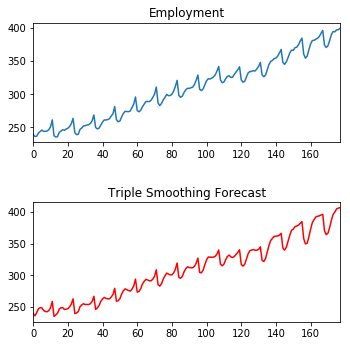

In [15]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Employment')
ax = fig.add_subplot(2,1,2)
wisc_emp['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')